<a href="https://colab.research.google.com/github/Muhammad-Salman-Hassan/DeepLearning/blob/main/Classification_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 125204 bytes


In [ ]:
import pandas as pd
import io
data=pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [ ]:
del data["Unnamed: 32"]

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X=data.iloc[:,2:].values
Y=data.iloc[:,1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
y=LE.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
X_train=Sc.fit_transform(X_train)
X_test=Sc.transform(X_test)



In [ ]:
data.shape

(569, 32)

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sbn
from sklearn.model_selection import  cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
model=Sequential()
#input first layer
model.add(Dense(units=16,activation='relu',input_dim=30,kernel_initializer='uniform'))
#input second layer
model.add(Dense(units=16,activation='relu',kernel_initializer='uniform'))
#input output layer
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [ ]:
#compiling
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,batch_size=100,epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 0.6929 - accuracy: 0.5359
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.6637
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.7024
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.7388
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.8130
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.8691
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.9032
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.9068
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.9242
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6441 - accuracy: 0.9279
Epoch 11/200
4/4 [===========

In [ ]:
predict=model.predict(X_test)
predict=predict>0.5

In [ ]:
predict

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
accuracy_score(predict,Y_test)

0.9707602339181286

In [ ]:
cm=confusion_matrix(predict,Y_test)

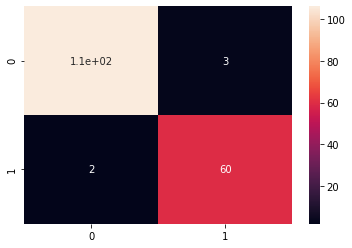

In [ ]:
sbn.heatmap(cm,annot=True,cbar=True)

**By using Drop out **

In [ ]:
model2=Sequential()
#input first layer
model2.add(Dense(units=16,activation='relu',input_dim=30,kernel_initializer='uniform'))
model2.add(Dropout(0.8))
#input second layer
model2.add(Dense(units=16,activation='relu',kernel_initializer='uniform'))
model2.add(Dropout(0.8))
#input output layer
model2.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [ ]:
model2.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
model2.fit(X_train,Y_train,batch_size=100,epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.6506
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.6714
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.6823
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.6944
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.6820
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.6657
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.6994
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.6747
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.7181
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.6811
Epoch 11/200
4/4 [===========

In [ ]:
accuracy_score(Y_test,predict)

0.9707602339181286

Using Kfold Ridge and Lasso

In [ ]:
def train():
  model=Sequential()
  model.add(Dense(units=16, kernel_initializer='uniform', activation='relu',input_dim=30))
  model.add(Dropout(0.8))
  model.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(0.8))
  model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
  model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

  

pred=KerasClassifier(build_fn=train,batch_size=100,epochs=200)
accuracy=cross_val_score(estimator=pred,X=X_train,y=Y_train,cv=10,n_jobs=-1)

In [ ]:
accuracy.mean()

0.9824359059333801

In [ ]:
accuracy

array([1.        , 1.        , 0.97500002, 1.        , 0.92500001,
       0.97500002, 0.97500002, 1.        , 0.97435898, 1.        ])